In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
filtered_df = pd.read_csv(r'../../data/processed/final_panel_data.csv')

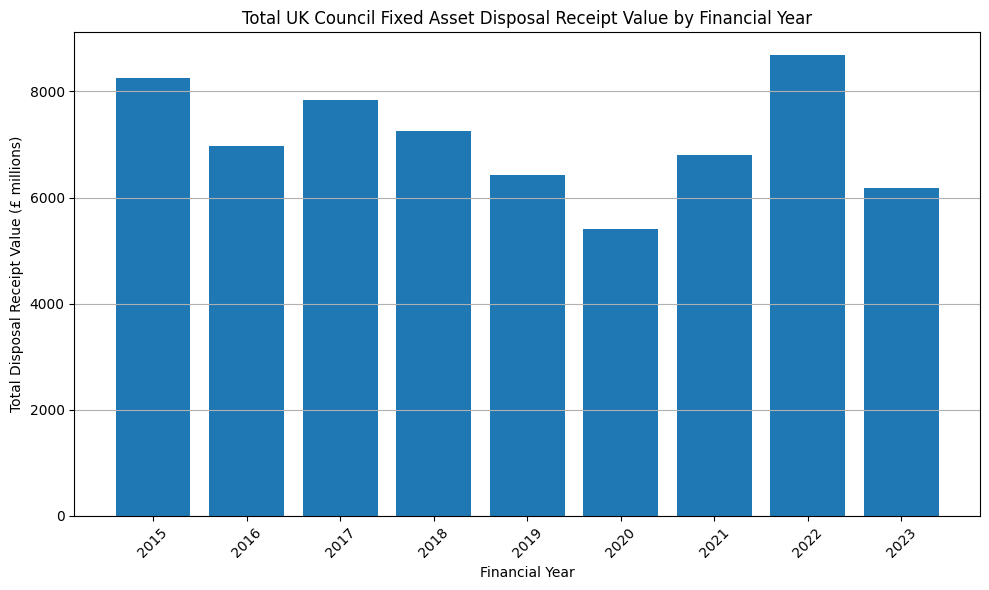

In [5]:
'''
Plot total UK Council Fixed Asset Disposal Receipt Value by Financial Year
This will show the total value of fixed asset disposals by UK councils, grouped by financial year
'''

# Group by financial year and sum the values
yearly_totals = filtered_df.groupby('financial_year')['value'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(yearly_totals['financial_year'], yearly_totals['value'])

plt.title('Total UK Council Fixed Asset Disposal Receipt Value by Financial Year')
plt.xlabel('Financial Year')
plt.ylabel('Total Disposal Receipt Value (£ millions)')

# Ensure all years are shown
plt.xticks(ticks=yearly_totals['financial_year'], rotation=45)

plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


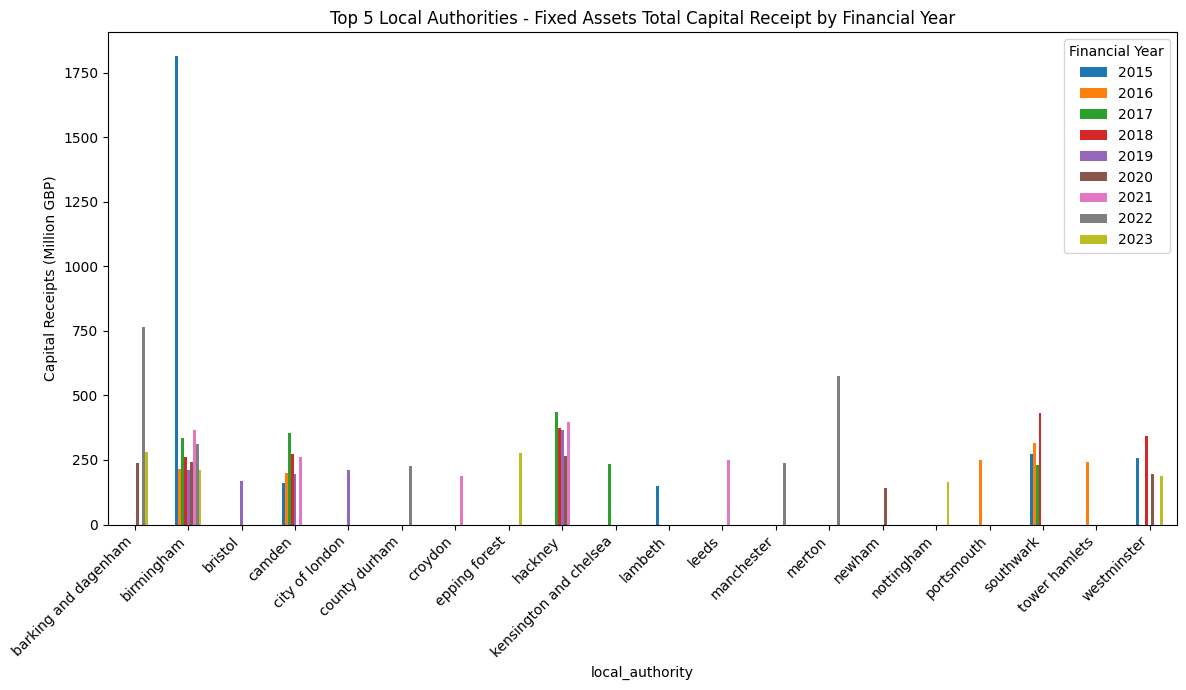

In [17]:
'''
Plot top 5 Local Authorities by fixed assets Capital Receipts by Year
This will show the top 5 local authorities by total fixed assets capital receipts for all services,
grouped by financial year.
'''
# Group and find top 5 councils per year
top5_per_year = (
    filtered_df.groupby(['financial_year', 'local_authority'])['value']
    .sum()
    .reset_index()
    .sort_values(['financial_year', 'value'], ascending=[True, False])
    .groupby('financial_year')
    .head(5)
)

# Pivot the table for plotting
pivot_top5 = top5_per_year.pivot(index='local_authority', columns='financial_year', values='value')

# Plot
pivot_top5.plot(kind='bar', figsize=(12, 7))

plt.ylabel('Capital Receipts (Million GBP)')
plt.title('Top 5 Local Authorities - Fixed Assets Total Capital Receipt by Financial Year')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Financial Year')
plt.tight_layout()
plt.show()



C:\Users\User\AppData\Local\Temp\ipykernel_24976\3775921932.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', num_lines).colors  # 'tab20' supports up to 20 distinct colours


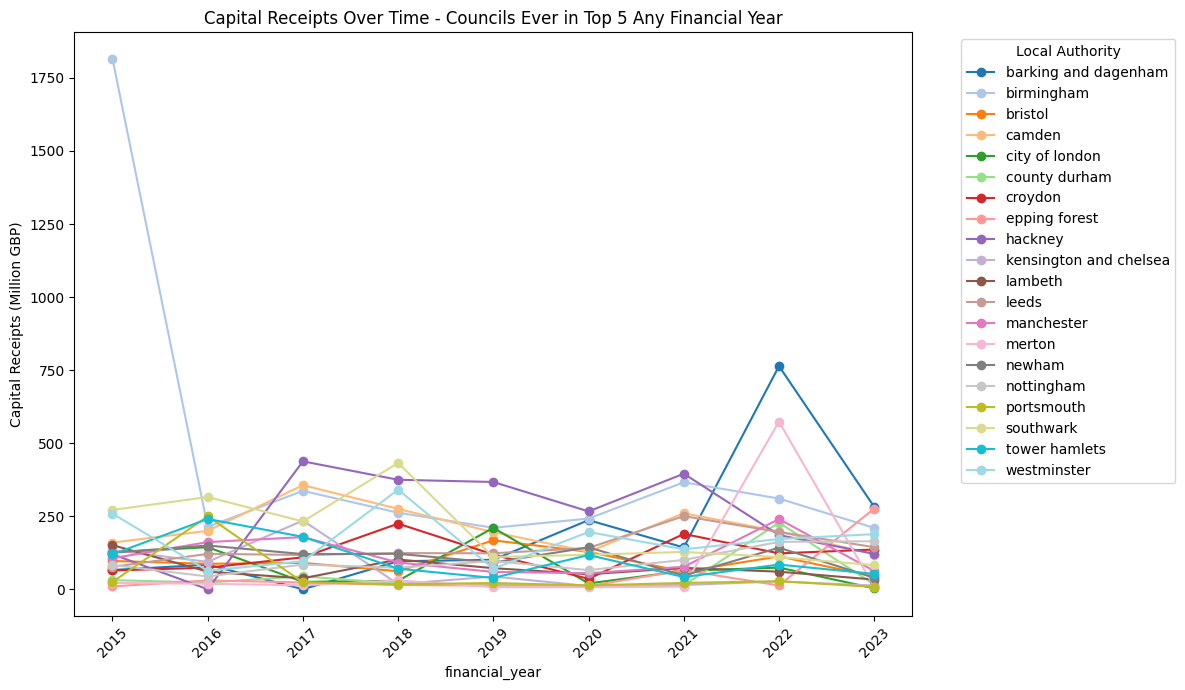

In [18]:
'''
Plot line graph of councils that were ever in top 8 by financial year
This will show the councils that were ever in the top 8 by total fixed assets capital receipts
for any year, plotted as a line graph over the years.
'''
# Get top 5 councils for each year
top5_each_year = (
    filtered_df.groupby(['financial_year', 'local_authority'])['value']
    .sum()
    .reset_index()
    .sort_values(['financial_year', 'value'], ascending=[True, False])
    .groupby('financial_year')
    .head(5)
)

# Get unique councils that were ever top 5
top_councils = top5_each_year['local_authority'].unique()

# Filter original data for these councils
df_top_councils = filtered_df[filtered_df['local_authority'].isin(top_councils)]

# Pivot for line plot
pivot_df = (
    df_top_councils.groupby(['financial_year', 'local_authority'])['value']
    .sum()
    .reset_index()
    .pivot(index='financial_year', columns='local_authority', values='value')
)

# Plot
num_lines = pivot_df.shape[1]
colors = cm.get_cmap('tab20', num_lines).colors  # 'tab20' supports up to 20 distinct colours

pivot_df.plot(
    figsize=(12, 7),
    marker='o',
    color=colors  # pass the colour list
)

plt.ylabel('Capital Receipts (Million GBP)')
plt.title('Capital Receipts Over Time - Councils Ever in Top 5 Any Financial Year')
plt.xticks(rotation=45)
plt.legend(title='Local Authority', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
